<a href="https://colab.research.google.com/github/hxtruong/fb-developer-circles/blob/master/week_5/Assignment_Week_4_TED_Talks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TED Talks

![](https://psmarketingimages.s3.amazonaws.com/blog/wp-content/uploads/2017/04/23103819/TED-Talks-for-Small-Business-and-Entrepreneurs.jpg)

_For more information about the dataset, read [here](https://www.kaggle.com/rounakbanik/ted-talks)._

## Information 
- Hoang Xuan Truong

## Tasks
- Read the source and do some quick research to understand more about the dataset and its topic
- Clean the data
- Perform Exploratory Data Analysis on the dataset
- Analyze the data more deeply and extract insights
- Visualize your analysis on Google Data Studio
- Present your works in front of the class and guests next Monday

## Submission Guide
- Create a Github repository for your project
- Upload the dataset (.csv file) and the Jupyter Notebook to your Github repository. In the Jupyter Notebook, **include the link to your Google Data Studio report**.
- Submit your works through this [Google Form](https://forms.gle/oxtXpGfS8JapVj3V8).

## Tips for Data Cleaning, Manipulation & Visualization
- Here are some of our tips for Data Cleaning, Manipulation & Visualization. [Click here](https://hackmd.io/cBNV7E6TT2WMliQC-GTw1A)

_____________________________

## Some Hints for This Dataset:
- The `ratings` column is in dictionary format. How should we handle them?
- Same for `related_talks` and `tags` column
- Can you find the `year` of the talks?
- And more...

# Find something fun about TED Talks

### Intro
TED Talks was founded in 1984 by Richard Saulman. It is place for peole share the incredible ideas about *Technology*, *Entertainment* and *Design* to everyone.

![TED Talks logo](https://raw.githubusercontent.com/hxtruong/dataset/master/ted-talks/TED.gif)

In recent years, the number of video is organized by TED Talks which is 
increasing in many countries, include of Vietnam. Althought these video are shared by experts from theirs field, I just want to watch **The most popular TED Talks** videos in the valuable videos.

### Purpose

1. Finding **the most popular videos** to watching base on some **factors**
2. Checking the highest views/comments videos is true in 80/20 (**Pareto Principle**) rule on total views/comments TED Talks
3. **Predicting** the trend video in fields (*Tech, Entertainment or Design*) via number of videos

## What data we have? 
*(Refer kaggle)*
#### Dataset contains two `csv` files:
 
 - ted_main.csv : Contains data on actual TED Talk metadata and TED Talk speakers
 - transcripts.csv : Contains transcript and URL information for TED Talks

### Columns in data
#### ted_main.csv
 - name: The official name of the TED Talk. Includes the title and the speaker.
 - title: The title of the talk
 - description: A blurb of what the talk is about.
 - main_speaker: The first named speaker of the talk.
 - speaker_occupation: The occupation of the main speaker.
 - num_speaker: The number of speakers in the talk.
 - duration: The duration of the talk in seconds.
 - event: The TED/TEDx event where the talk took place.
 - film_date: The Unix timestamp of the filming.
 - published_date: The Unix timestamp for the publication of the talk on TED.com
 - comments: The number of first level comments made on the talk.
 - tags: The themes associated with the talk.
 - languages: The number of languages in which the talk is available.
 - ratings: A stringified dictionary of the various ratings given to the talk (inspiring, fascinating, jaw dropping, etc.)
 - related_talks: A list of dictionaries of recommended talks to watch next.
 - url: The URL of the talk.
 - views: The number of views on the talk.

#### transcripts.csv
 - transcript: The official English transcript of the talk.
 - url: The URL of the talk

### Load Libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
%matplotlib inline
sns.set()

# To avoid Warning message inbetween ...
import warnings
warnings.filterwarnings('ignore')

### Load the Dataset

I load `ted_main.csv` at first.

In [0]:
# Load the Dataset
link = "https://raw.githubusercontent.com/hxtruong/dataset/master/ted-talks/ted_main.csv"
# transcription_link = "https://raw.githubusercontent.com/hxtruong/dataset/master/ted-talks/transcripts.csv"
df = pd.read_csv(link, skipinitialspace=True)

### Quick Analysis on Dataset

In [0]:
#Quick Analysis on Dataset : DataTypes, Rows and Columns ,Null values, Unique values ...
def quick_analysis(df):
    print("Data Types:")
    print(df.dtypes)
    print("\n-----\nRows and Columns:")
    print(df.shape)
    print("\n-----\nColumn names:")
    print(df.columns)
    print("\n-----\nPercent Null Values")
    print(df.apply(lambda x: sum(x.isnull()) / len(df)))
    print("\n-----\nUnique values")
    print(df.nunique())

quick_analysis(df)

Data Types:
comments               int64
description           object
duration               int64
event                 object
film_date              int64
languages              int64
main_speaker          object
name                  object
num_speaker            int64
published_date         int64
ratings               object
related_talks         object
speaker_occupation    object
tags                  object
title                 object
url                   object
views                  int64
dtype: object

-----
Rows and Columns:
(2550, 17)

-----
Column names:
Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views'],
      dtype='object')

-----
Percent Null Values
comments              0.000000
description           0.000000
duration              0.000000
event                 0.000000
film_dat

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
comments              2550 non-null int64
description           2550 non-null object
duration              2550 non-null int64
event                 2550 non-null object
film_date             2550 non-null int64
languages             2550 non-null int64
main_speaker          2550 non-null object
name                  2550 non-null object
num_speaker           2550 non-null int64
published_date        2550 non-null int64
ratings               2550 non-null object
related_talks         2550 non-null object
speaker_occupation    2544 non-null object
tags                  2550 non-null object
title                 2550 non-null object
url                   2550 non-null object
views                 2550 non-null int64
dtypes: int64(7), object(10)
memory usage: 338.8+ KB


**>Comment**

From information above:
  - Dataset have 6 *`null`* `speaker_occupation` values.
  - Data is clean enough to exploring

##### Show 5 random videos in dataset

In [0]:
df.sample(5)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
2094,21,"Kristen Marhaver studies corals, tiny creature...",826,Mission Blue II,1444435200,27,Kristen Marhaver,Kristen Marhaver: How we're growing baby coral...,1,1448985898,"[{'id': 1, 'name': 'Beautiful', 'count': 193},...","[{'id': 519, 'hero': 'https://pe.tedcdn.com/im...",Coral reef biologist,"['TED Fellows', 'animals', 'biology', 'climate...",How we're growing baby corals to rebuild reefs,https://www.ted.com/talks/kristen_marhaver_how...,729236
1639,265,"""In the cathedral of the wild, we get to see t...",899,TEDWomen 2013,1386201600,36,Boyd Varty,Boyd Varty: What I learned from Nelson Mandela,1,1386605235,"[{'id': 25, 'name': 'OK', 'count': 81}, {'id':...","[{'id': 294, 'hero': 'https://pe.tedcdn.com/im...",Environmental and literacy activist,"['Africa', 'culture', 'nature']",What I learned from Nelson Mandela,https://www.ted.com/talks/boyd_varty_what_i_le...,1585575
737,123,"Break down the oil slick, keep it off the shor...",1002,TEDxOilSpill,1277683200,17,Susan Shaw,Susan Shaw: The oil spill's toxic trade-off,1,1280221320,"[{'id': 24, 'name': 'Persuasive', 'count': 107...","[{'id': 914, 'hero': 'https://pe.tedcdn.com/im...",Marine toxicologist,"['TEDx', 'business', 'chemistry', 'disaster re...",The oil spill's toxic trade-off,https://www.ted.com/talks/susan_shaw_the_oil_s...,220099
1211,409,"At TEDxCambridge, Michael Norton shares fascin...",658,TEDxCambridge,1321574400,40,Michael Norton,Michael Norton: How to buy happiness,1,1335280653,"[{'id': 8, 'name': 'Informative', 'count': 663...","[{'id': 1119, 'hero': 'https://pe.tedcdn.com/i...",Social science researcher,"['TEDx', 'business', 'community', 'consumerism...",How to buy happiness,https://www.ted.com/talks/michael_norton_how_t...,3539952
496,752,Too much of the world lacks access to clean dr...,571,TEDGlobal 2009,1248220800,32,Michael Pritchard,Michael Pritchard: How to make filthy water dr...,1,1249347600,"[{'id': 8, 'name': 'Informative', 'count': 697...","[{'id': 2, 'hero': 'https://pe.tedcdn.com/imag...",Inventor,"['business', 'demo', 'design', 'global issues'...",How to make filthy water drinkable,https://www.ted.com/talks/michael_pritchard_in...,3573198


##### Change time to easy understand

In [0]:
from datetime import datetime
df['film_date'] = df['film_date'].apply(lambda x: datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))
df['published_date'] = df['published_date'].apply(lambda x: datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))

In [0]:
df.loc[:3, ['title', 'film_date', 'published_date']]

,title,film_date,published_date
0,Do schools kill creativity?,25-02-2006,27-06-2006
1,Averting the climate crisis,25-02-2006,27-06-2006
2,Simplicity sells,24-02-2006,27-06-2006
3,Greening the ghetto,26-02-2006,27-06-2006


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
comments              2550 non-null int64
description           2550 non-null object
duration              2550 non-null int64
event                 2550 non-null object
film_date             2550 non-null object
languages             2550 non-null int64
main_speaker          2550 non-null object
name                  2550 non-null object
num_speaker           2550 non-null int64
published_date        2550 non-null object
ratings               2550 non-null object
related_talks         2550 non-null object
speaker_occupation    2544 non-null object
tags                  2550 non-null object
title                 2550 non-null object
url                   2550 non-null object
views                 2550 non-null int64
dtypes: int64(5), object(12)
memory usage: 338.8+ KB


##### Swap columns for easily explore

In [0]:
cols = df.columns
cols = ['name', 'title', 'main_speaker', 'duration', 'views', 'comments', 
        'description', 'event', 'film_date','published_date',
        'languages',  'num_speaker', 'ratings', 'related_talks', 
        'speaker_occupation', 'tags', 'url']
df = df.reindex(columns=cols)
df.columns

Index(['name', 'title', 'main_speaker', 'duration', 'views', 'comments',
       'description', 'event', 'film_date', 'published_date', 'languages',
       'num_speaker', 'ratings', 'related_talks', 'speaker_occupation', 'tags',
       'url'],
      dtype='object')

In [0]:
df.head(2)

,name,title,main_speaker,duration,views,comments,description,event,film_date,published_date,languages,num_speaker,ratings,related_talks,speaker_occupation,tags,url
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Ken Robinson,1164,47227110,4553,Sir Ken Robinson makes an entertaining and pro...,TED2006,25-02-2006,27-06-2006,60,1,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",https://www.ted.com/talks/ken_robinson_says_sc...
1,Al Gore: Averting the climate crisis,Averting the climate crisis,Al Gore,977,3200520,265,With the same humor and humanity he exuded in ...,TED2006,25-02-2006,27-06-2006,43,1,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",https://www.ted.com/talks/al_gore_on_averting_...


##### Describe dataset

In [0]:
df.describe()

,duration,views,comments,languages,num_speaker
count,2550.000000,2.550000e+03,2550.000000,2550.000000,2550.000000
mean,826.510196,1.698297e+06,191.562353,27.326275,1.028235
std,374.009138,2.498479e+06,282.315223,9.563452,0.207705
min,135.000000,5.044300e+04,2.000000,0.000000,1.000000
25%,577.000000,7.557928e+05,63.000000,23.000000,1.000000
50%,848.000000,1.124524e+06,118.000000,28.000000,1.000000
75%,1046.750000,1.700760e+06,221.750000,33.000000,1.000000
max,5256.000000,4.722711e+07,6404.000000,72.000000,5.000000


### Data Manuplation in the Dataset

In dataset, I realize that `name` is combined `title` and `main_speaker` which is not nessersary.

In [0]:
df.head(1)

,name,title,main_speaker,duration,views,comments,description,event,film_date,published_date,languages,num_speaker,ratings,related_talks,speaker_occupation,tags,url
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Ken Robinson,1164,47227110,4553,Sir Ken Robinson makes an entertaining and pro...,TED2006,25-02-2006,27-06-2006,60,1,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",https://www.ted.com/talks/ken_robinson_says_sc...


In [0]:
(df['name'] == df['main_speaker']+ ": " + df['title']).value_counts()

True     2541
False       9
dtype: int64

There are 9 `name` is not combined by `speaker` and `title`

In [0]:
df[df['name'] != df['main_speaker']+ ": " + df['title']][['name', 'title', 'main_speaker']]

,name,title,main_speaker
898,Patricia Ryan: Don't insist on English!,Don't insist on English!,Patricia Ryan
1543,The interspecies internet? An idea in progress,The interspecies internet? An idea in progress,"Diana Reiss, Peter Gabriel, Neil Gershenfeld a..."
1549,Two young scientists break down plastics with ...,Two young scientists break down plastics with ...,Miranda Wang and Jeanny Yao
1745,Tristram Wyatt: The smelly mystery of the huma...,The smelly mystery of the human pheromone,Tristram Wyatt
1768,"Anne Curzan: What makes a word ""real""?","What makes a word ""real""?",Anne Curzan
1769,Ruth Chang: How to make hard choices,How to make hard choices,Ruth Chang
1845,Susan Etlinger: What do we do with all this bi...,What do we do with all this big data?,Susan Etlinger
2466,Michael Bierut: How to design a library that m...,How to design a library that makes kids want t...,Michael Bierut
2512,Jack Conte: How artists can (finally) get paid...,How artists can (finally) get paid in the digi...,Jack Conte


After see the difference, that is not special. So it should drop `name` columns.

In [0]:
df.drop(columns=['name'], inplace=True)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 16 columns):
title                 2550 non-null object
main_speaker          2550 non-null object
duration              2550 non-null int64
views                 2550 non-null int64
comments              2550 non-null int64
description           2550 non-null object
event                 2550 non-null object
film_date             2550 non-null object
published_date        2550 non-null object
languages             2550 non-null int64
num_speaker           2550 non-null int64
ratings               2550 non-null object
related_talks         2550 non-null object
speaker_occupation    2544 non-null object
tags                  2550 non-null object
url                   2550 non-null object
dtypes: int64(5), object(11)
memory usage: 318.8+ KB


## 1. Finding the most popular TED Talks videos

#### **> Views**

- The *popular* video should be had **high views**. The number of views indicate the popular of that video which tell other that this video has quality content, so it will attractive many people.

> Top **10 videos** has the highest views

In [0]:
view_sorted_talks = df[['title', 'main_speaker', 'film_date', 'comments', 'views']].sort_values(by=['views'], ascending=False)
view_sorted_talks[:10]

,title,main_speaker,film_date,comments,views
0,Do schools kill creativity?,Ken Robinson,25-02-2006,4553,47227110
1346,Your body language may shape who you are,Amy Cuddy,26-06-2012,2290,43155405
677,How great leaders inspire action,Simon Sinek,17-09-2009,1930,34309432
837,The power of vulnerability,Brené Brown,06-06-2010,1927,31168150
452,10 things you didn't know about orgasm,Mary Roach,06-02-2009,354,22270883
1776,How to speak so that people want to listen,Julian Treasure,10-06-2013,297,21594632
201,My stroke of insight,Jill Bolte Taylor,27-02-2008,2877,21190883
5,Why we do what we do,Tony Robbins,02-02-2006,672,20685401
2114,This is what happens when you reply to spam email,James Veitch,08-12-2015,150,20475972
1416,"Looks aren't everything. Believe me, I'm a model.",Cameron Russell,27-10-2012,846,19787465


> Diplay view of video on chart

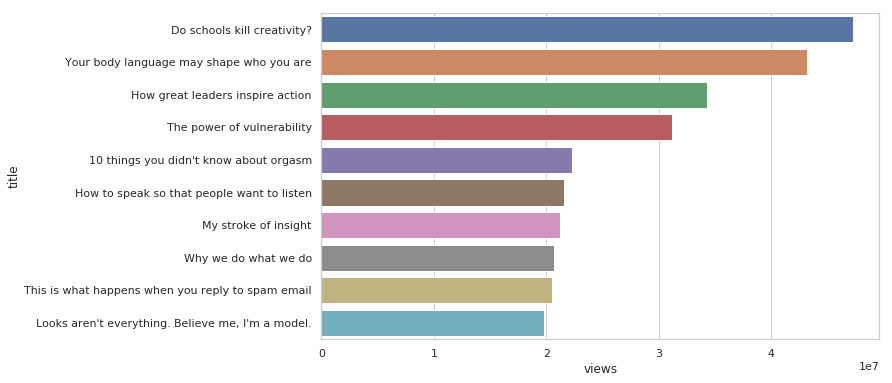

In [0]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.barplot(x='views', y='title', data=view_sorted_talks[:10])

> Beside, I display the distibution of the views in TED Talks

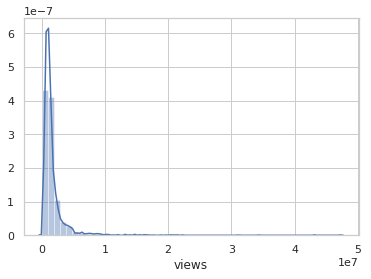

In [0]:
sns.distplot(df['views'])

In [0]:
df['views'].describe()

count    2.550000e+03
mean     1.698297e+06
std      2.498479e+06
min      5.044300e+04
25%      7.557928e+05
50%      1.124524e+06
75%      1.700760e+06
max      4.722711e+07
Name: views, dtype: float64

> The average number of views on videos is **1.6** million views.

#### > Comments
- A popular TED Talk will take attention of viewers. So these videos should have many **comments**

> Top **10** videos has *high number comments*

In [0]:
cmt_sorted_talks = df[['title', 'main_speaker', 'film_date', 'comments', 'views']].sort_values(by=['comments'], ascending=False)
cmt_sorted_talks[:10]

,title,main_speaker,film_date,comments,views
96,Militant atheism,Richard Dawkins,02-02-2002,6404,4374792
0,Do schools kill creativity?,Ken Robinson,25-02-2006,4553,47227110
644,Science can answer moral questions,Sam Harris,11-02-2010,3356,3433437
201,My stroke of insight,Jill Bolte Taylor,27-02-2008,2877,21190883
1787,How do you explain consciousness?,David Chalmers,18-03-2014,2673,2162764
954,Taking imagination seriously,Janet Echelman,03-03-2011,2492,1832930
840,On reading the Koran,Lesley Hazleton,10-10-2010,2374,1847256
1346,Your body language may shape who you are,Amy Cuddy,26-06-2012,2290,43155405
661,The danger of science denial,Michael Specter,11-02-2010,2272,1838628
677,How great leaders inspire action,Simon Sinek,17-09-2009,1930,34309432


> The chart show comments count

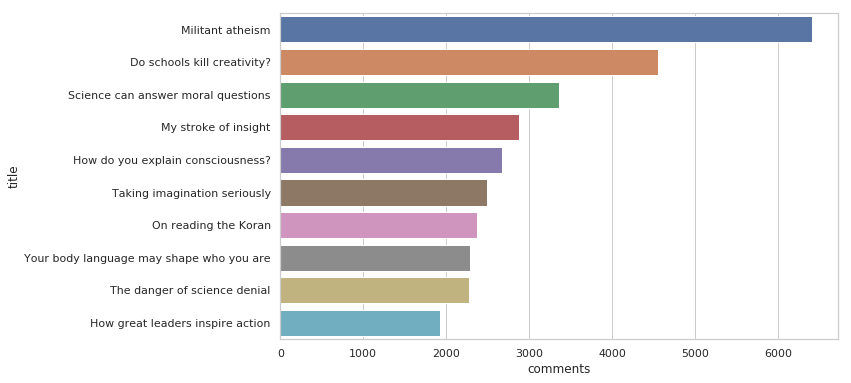

In [0]:
plt.figure(figsize=(10,6))
sns.barplot(x='comments', y='title', data=cmt_sorted_talks[:10])

> Merge data: video has high views and high comments

Will these high quality videos same high number of views and comments?

In [0]:
merge_df = pd.merge(view_sorted_talks[:10], cmt_sorted_talks[:10], how='outer')
merge_df

,title,main_speaker,film_date,comments,views
0,Do schools kill creativity?,Ken Robinson,25-02-2006,4553,47227110
1,Your body language may shape who you are,Amy Cuddy,26-06-2012,2290,43155405
2,How great leaders inspire action,Simon Sinek,17-09-2009,1930,34309432
3,The power of vulnerability,Brené Brown,06-06-2010,1927,31168150
4,10 things you didn't know about orgasm,Mary Roach,06-02-2009,354,22270883
5,How to speak so that people want to listen,Julian Treasure,10-06-2013,297,21594632
6,My stroke of insight,Jill Bolte Taylor,27-02-2008,2877,21190883
7,Why we do what we do,Tony Robbins,02-02-2006,672,20685401
8,This is what happens when you reply to spam email,James Veitch,08-12-2015,150,20475972
9,"Looks aren't everything. Believe me, I'm a model.",Cameron Russell,27-10-2012,846,19787465


> **> Discuss**

  - When merge two table has top 10 highest views and highest comments, there are **16 video** which might consider the most popular videos on TED Talks.
  - From the 10th video on the rank, these videos have many comments although they has significantly view than others. It can be explained by the complex and arguable of problem in video. Ex: **Militant atheism**, **Science can answer moral questions**,... is always the most debate topic in all of time
   > But these video can be considered as the quality TED Talks to watch.

We can see the correlation between **views** and **comments** in *total data* below:

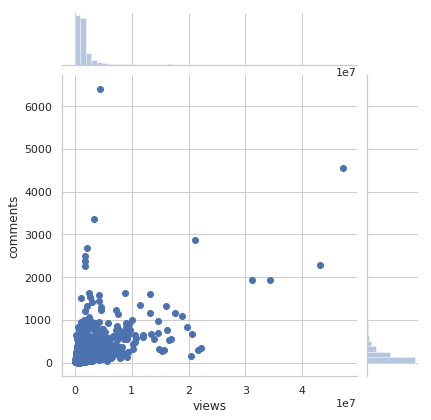

In [0]:
sns.jointplot(x='views', y='comments', data=df)

In [0]:
df[['views', 'comments']].corr()

,views,comments
views,1.000000,0.530939
comments,0.530939,1.000000


> From above, we can say the relationship between number of **views** and **comments** is high. It mean, if a video has high number of **views**, it will tend to has high number of **comments**

#### > Event
- Is a TED Talks well-known relate to **event** where was ogranized?

> Let's check how many event in TED Talks?

In [0]:
print("There are have: ", df['event'].nunique(), "events.")
print("Example (30 events first):")
df['event'].unique()[:30]

There are have:  355 events.
Example (30 events first):


array(['TED2006', 'TED2004', 'TED2005', 'TEDGlobal 2005', 'TEDSalon 2006',
       'TED2003', 'TED2007', 'TED2002', 'TEDGlobal 2007',
       'TEDSalon 2007 Hot Science', 'Skoll World Forum 2007', 'TED2008',
       'TED1984', 'TED1990', 'DLD 2007', 'EG 2007', 'TED1998',
       'LIFT 2007', 'TED Prize Wish', 'TEDSalon 2009 Compassion',
       'Chautauqua Institution', 'Serious Play 2008', 'Taste3 2008',
       'TED2001', 'TED in the Field', 'TED2009', 'EG 2008',
       'Elizabeth G. Anderson School', 'TEDxUSC', 'TED@State'],
      dtype=object)

> Actually, TED Talks has two main type of event: **TED** and **TEDx** type.

- **TED talks** cover almost all topics — from science to business to global issues — in more than 100 languages. You can read more about the history of the TED movement here.

- **TEDx** was then started as a way to allow groups and individuals to host local, self-organised events around the world.

Ref: https://www.quora.com/Whats-the-difference-between-TED-and-TEDx

> Create **event_type** column. This columns tell which type of event TED Talks.

In [0]:
df['event'].str.match('(TED)x?').sum()

2439

> There are just **2439**/**2550** videos which has exactly type of event. If not belong any type, assign it to '*none*' string.

In [0]:
import re
df['event_type'] = df['event'].apply(lambda x: re.search('(TED)x?', x).group(0) if re.search('(TED)x?', x) else 'none' )
df['event_type'].value_counts()

TED     1968
TEDx     471
none     111
Name: event_type, dtype: int64

> Caculating the ratio of the number views (or comments) on the number of event type video.

=> Which ratio **higher** mean has **more atractive** view/comment on type of event.

`radius = sum(views of event_type)/sum(number of video in event_type)`

In [0]:
view_on_event_type = df.groupby(by='event_type')['views'].sum()/df['event'].value_counts()[0]
view_on_event_type = view_on_event_type.reset_index()
view_on_event_type

,event_type,views
0,TED,4.144399e+07
1,TEDx,8.783009e+06
2,none,1.328462e+06


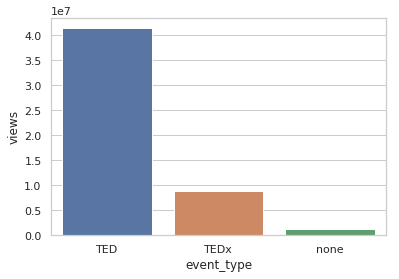

In [0]:
sns.barplot(x='event_type', y='views', data=view_on_event_type)

> From the above chart, *the more popular TED Talks* will be ogranized in **TED event**. 

This is easy to observe because TED event are presentations in world scope. Meanwhile, TEDx is showed in local scope or just a group. 

#### > Ratings
- To know which TED Talks are popular, content of video is **also** *important factor* to decide.
- Content in dataset is divided into some type that is stored in **ratings** attribute

> Let show some ratings TED Talks

In [0]:
print(df['ratings'].sample(4))
print(type(df['ratings'][0]))

1882    [{'id': 25, 'name': 'OK', 'count': 97}, {'id':...
1243    [{'id': 8, 'name': 'Informative', 'count': 506...
2253    [{'id': 1, 'name': 'Beautiful', 'count': 1057}...
688     [{'id': 25, 'name': 'OK', 'count': 438}, {'id'...
Name: ratings, dtype: object
<class 'str'>


> **ratings** in dataset is `string` type. We need to convert it to `object` to easy handle.

- **rating** is parsed to **list**. 
- This **list** contains many **object**. 
- A **object** is include: **id**, **name**, **count**

In [0]:
df['ratings'] = df['ratings'].apply(lambda x: eval(x))
type(df['ratings'][0])

list

An example **rating** of row in dataset

In [0]:
print("Rating at row 0: \n", df['ratings'][0])
print("All name of rating at row 0: \n")
[x['name'] for x in df['ratings'][0]]

Rating at row 0: 
 [{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}]
All name of rating at row 0: 



['Funny',
 'Beautiful',
 'Ingenious',
 'Courageous',
 'Longwinded',
 'Confusing',
 'Informative',
 'Fascinating',
 'Unconvincing',
 'Persuasive',
 'Jaw-dropping',
 'OK',
 'Obnoxious',
 'Inspiring']

> Get all **rating** name

In [0]:
rate_df = pd.DataFrame(data=df['title'], columns=['title'])
rate_names = defaultdict(list)
for index, row in df.iterrows():
  rates = row['ratings']
  for rate in rates:
    rate_names[rate['name']].append(rate['count'])
rate_names.keys()

dict_keys(['Funny', 'Beautiful', 'Ingenious', 'Courageous', 'Longwinded', 'Confusing', 'Informative', 'Fascinating', 'Unconvincing', 'Persuasive', 'Jaw-dropping', 'OK', 'Obnoxious', 'Inspiring'])

In [0]:
for index, (key, value) in enumerate(rate_names.items()):
  rate_df.insert(loc=index, column=key.lower(), value=value, allow_duplicates=False)
rate_df.head()

,funny,beautiful,ingenious,courageous,longwinded,confusing,informative,fascinating,unconvincing,persuasive,jaw-dropping,ok,obnoxious,inspiring,title
0,19645,4573,6073,3253,387,242,7346,10581,300,10704,4439,1174,209,24924,Do schools kill creativity?
1,544,58,56,139,113,62,443,132,258,268,116,203,131,413,Averting the climate crisis
2,964,60,183,45,78,27,395,166,104,230,54,146,142,230,Simplicity sells
3,59,291,105,760,53,32,380,132,36,460,230,85,35,1070,Greening the ghetto
4,1390,942,3202,318,110,72,5433,4606,67,2542,3736,248,61,2893,The best stats you've ever seen


> Now we have a rate dataframe which indicate how many a rating name was counted in each TED Talks.

Let's calculate **total number of rate** on every video then check if a video has many **rate** that will **popular**?

In [0]:
rate_df['total'] = rate_df.loc[:, (rate_df.columns != 'title')].sum(axis=1)

In [0]:
# swap title, total colum to first colum of dataframe
cols = list(rate_df)
cols[0], cols[len(cols)-2] = cols[len(cols)-2] , cols[0]
cols[1], cols[len(cols)-1] = cols[len(cols)-1], cols[1]
rate_df = rate_df.reindex(columns=cols)
rate_df.columns

Index(['title', 'total', 'ingenious', 'courageous', 'longwinded', 'confusing',
       'informative', 'fascinating', 'unconvincing', 'persuasive',
       'jaw-dropping', 'ok', 'obnoxious', 'inspiring', 'funny', 'beautiful'],
      dtype='object')

> Get **top 10** videos have **the most rating**

In [0]:
rate_df.sort_values(['total'], ascending=False, inplace=True)
rate_df[:10]

,title,total,ingenious,courageous,longwinded,confusing,informative,fascinating,unconvincing,persuasive,jaw-dropping,ok,obnoxious,inspiring,funny,beautiful
0,Do schools kill creativity?,93850,6073,3253,387,242,7346,10581,300,10704,4439,1174,209,24924,19645,4573
201,My stroke of insight,70665,1228,7842,398,289,5430,14447,550,1704,10464,636,356,16918,966,9437
1346,Your body language may shape who you are,65968,1428,6305,338,197,9787,11111,335,6217,3586,1129,155,21210,938,3232
837,The power of vulnerability,60078,1094,8280,283,155,4561,4638,233,3510,2100,500,113,21444,5225,7942
677,How great leaders inspire action,56779,3413,1161,390,112,6600,7440,930,8845,2659,1341,294,21564,390,1640
1030,How to live before you die,38158,1197,4151,158,138,1368,3364,201,2606,2051,863,134,17290,783,3854
1129,The happy secret to better work,32180,1162,471,78,61,3886,2529,82,3426,683,206,61,11213,7315,1007
1163,The power of introverts,30037,830,3944,163,83,3623,3157,147,3365,442,469,80,10218,1049,2467
176,Underwater astonishments,30011,543,216,79,95,3875,8448,80,236,8328,322,126,1647,815,5201
530,The danger of a single story,29775,744,2817,109,85,2687,2983,103,3002,948,333,78,9566,713,5607


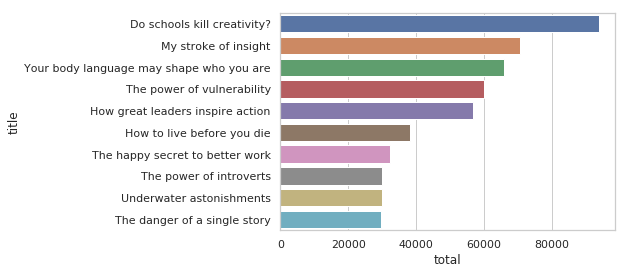

In [0]:
sns.barplot(x='total', y='title', data=rate_df[:10])

> Now there are **top 10** rating on TED Talks. These videos should be famous.

Let's show the correlation among **number of rating**, **number of views** and **number of comments**

In [0]:
rating_update_df = df.merge(rate_df, how = 'left', on = ['title'])
rating_update_df[['views','comments','total']].corr()

,views,comments,total
views,1.000000,0.530939,0.865586
comments,0.530939,1.000000,0.644329
total,0.865586,0.644329,1.000000


Text(0, 0.5, 'Total Rating')

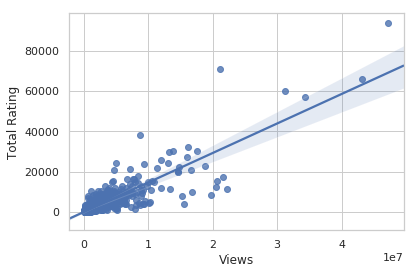

In [0]:
sns.regplot(x="views", y="total", data=rating_update_df)
plt.xlabel("Views")
plt.ylabel("Total Rating")

Text(0, 0.5, 'Total Rating')

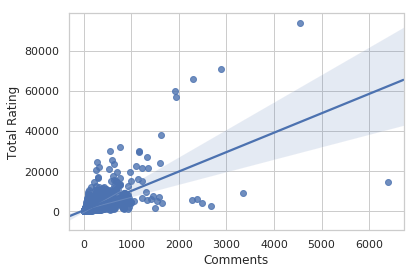

In [0]:
sns.regplot(x="comments", y="total", data=rating_update_df)
plt.xlabel("Comments")
plt.ylabel("Total Rating")

> From **correlation** and **two chart** above, the videos will has great of deal **rating** if it has high number **views** or **comments**

That makes sense, because viewer tend to watch the TED Talks before they **rate** it. **Comments** has also correlated with **rating**, but not as much as **views**

#### > Tags
- **tag** of video ***can*** also affect to number of **views** or in other words the popular TED Talks.
- Thus, some people might search video base on **tag** (e.g: education, science, AI,...). So, these TED Talks will be famous.

In [0]:
df['tags'] = df['tags'].apply(lambda x: eval(x))
df['tags'].head()

0    [children, creativity, culture, dance, educati...
1    [alternative energy, cars, climate change, cul...
2    [computers, entertainment, interface design, m...
3    [MacArthur grant, activism, business, cities, ...
4    [Africa, Asia, Google, demo, economics, global...
Name: tags, dtype: object

In [0]:
# Get list tag name
tags_dict = defaultdict(int)
for tags in df['tags']:
  for tag in tags:
    if tag in tags_dict:
      tags_dict[tag] += 1
    else:
      tags_dict[tag] = 1

Get **top 10** tags has the most mention on videos

In [0]:
from collections import Counter 
top_10_tags = Counter(tags_dict).most_common(10)
top_10_tags

[('technology', 727),
 ('science', 567),
 ('global issues', 501),
 ('culture', 486),
 ('TEDx', 450),
 ('design', 418),
 ('business', 348),
 ('entertainment', 299),
 ('health', 236),
 ('innovation', 229)]

In [0]:
top_10_tag_names = [x[0] for x in top_10_tags]
top_10_tag_names

['technology',
 'science',
 'global issues',
 'culture',
 'TEDx',
 'design',
 'business',
 'entertainment',
 'health',
 'innovation']

> That is **top 10 tag name** in dataset.

Check **top 10 views** videos has any **top 10 tag name**?

In [0]:
def getInTop10Tag(tags):
  top_tag = []
  for tag in tags:
    if tag in top_10_tag_names:
      top_tag.append(tag)
  return top_tag

In [0]:
df['in_top_10_tag'] = df['tags'].apply(lambda x: getInTop10Tag(x))
top_tags_df = df.sort_values(by=['views'], ascending=False)[['title', 'views', 'comments', 'in_top_10_tag']]
top_tags_df[:10]

,title,views,comments,in_top_10_tag
0,Do schools kill creativity?,47227110,4553,[culture]
1346,Your body language may shape who you are,43155405,2290,[business]
677,How great leaders inspire action,34309432,1930,"[TEDx, business]"
837,The power of vulnerability,31168150,1927,"[TEDx, culture]"
452,10 things you didn't know about orgasm,22270883,354,"[culture, science]"
1776,How to speak so that people want to listen,21594632,297,[culture]
201,My stroke of insight,21190883,2877,"[global issues, science]"
5,Why we do what we do,20685401,672,"[business, culture, entertainment]"
2114,This is what happens when you reply to spam email,20475972,150,[technology]
1416,"Looks aren't everything. Believe me, I'm a model.",19787465,846,"[TEDx, culture]"


> All video has **top 10 tag name**

In [0]:
top_tags_df['in_top_10_tag'].apply(lambda x:  len(x) != 0).value_counts()

True     2188
False     362
Name: in_top_10_tag, dtype: int64

Text(0, 0.5, 'Number TED Talks')

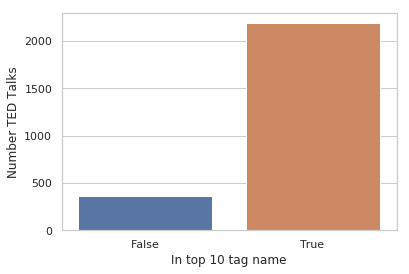

In [0]:
count_tag_df = top_tags_df['in_top_10_tag'].apply(lambda x:  len(x) != 0).value_counts().reset_index()
sns.barplot(x='index', y='in_top_10_tag', data=count_tag_df)
plt.xlabel('In top 10 tag name')
plt.ylabel('Number TED Talks')

> From number video has top 10 tag name and the chart, we can conclude that **top 10 tag** in TED Talks **did not affect** on the popular of video.

Since **number of videos** has **top tag name** is 2188/2550 which is **85.8%** percent. That doesn't make sense on the popular TED Talks.

## 2. The 80/20 (**Pareto Principle**) rule is true on TED Talks